In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model

In [2]:
fifa1 = pd.read_csv('fifa21_train.csv')

1. Understanding our data

In [3]:
fifa1.head()

,ID,Name,Age,Nationality,Club,BP,Position,Team & Contract,Height,Weight,...,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,OVA
0,184383,A. Pasche,26,Switzerland,FC Lausanne-Sport,CM,CM CDM,FC Lausanne-Sport 2015 ~ 2020,"5'9""",161lbs,...,59+1,59+1,59+1,58+1,54+1,54+1,54+1,58+1,15+1,64
1,188044,Alan Carvalho,30,China PR,Beijing Sinobo Guoan FC,ST,ST LW LM,"Beijing Sinobo Guoan FC Dec 31, 2020 On Loan","6'0""",159lbs,...,53+2,53+2,57+2,53+2,48+2,48+2,48+2,53+2,18+2,77
2,184431,S. Giovinco,33,Italy,Al Hilal,CAM,CAM CF,Al Hilal 2019 ~ 2022,"5'4""",134lbs,...,56+2,56+2,59+2,53+2,41+2,41+2,41+2,53+2,12+2,80
3,233796,J. Evans,22,Wales,Swansea City,CDM,CDM CM,Swansea City 2016 ~ 2021,"5'10""",152lbs,...,58+2,58+2,56+2,57+2,58+2,58+2,58+2,57+2,14+2,59
4,234799,Y. Demoncy,23,France,US Orléans Loiret Football,CDM,CDM CM,US Orléans Loiret Football 2018 ~ 2021,"5'11""",150lbs,...,64+2,64+2,64+2,63+2,61+2,61+2,61+2,63+2,15+2,65


1. Delete 'iD', drop postion, 'club', 'team and contract, 'total stats', delete the subcategories and keep "attacking, skill,movement, power, mentality, goalkepping, defending, traits", delete the columns that they don't play in
2. Split the column, 'Position'
3. Height convert into cm
4. Weight into kg
5. Drop the +1
6. W/F and SM - get rid of the star
6. ' Value', 'wage' and release clause convert into numerical


In [4]:
# Standardize our columns so they look the same
cols =[]
for colname in fifa1.columns:
    cols.append(colname.lower().replace(' ','_'))
fifa1.columns = cols

pd.set_option('display.max_columns', 500)
fifa1.head()


,id,name,age,nationality,club,bp,position,team_&_contract,height,weight,foot,growth,joined,loan_date_end,value,wage,release_clause,contract,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,w/f,sm,a/w,d/w,ir,pac,sho,pas,dri,def,phy,hits,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,ova
0,184383,A. Pasche,26,Switzerland,FC Lausanne-Sport,CM,CM CDM,FC Lausanne-Sport 2015 ~ 2020,"5'9""",161lbs,Right,1,"Jul 1, 2015",NaN,€525K,€4K,€801K,2015 ~ 2020,258,54,47,43,70,44.0,286,61,44.0,55,63,63,346,64,73,61.0,66,82.0,306,62,73.0,71,55,45,290,54,52.0,62.0,68.0,54,54.0,148,49,56,43.0,48,7,12,14,9,6,1682,357,4 ★,2★,High,Medium,1 ★,69,51,63,63,51,60,3,58+1,58+1,58+1,61+0,62+0,62+0,62+0,61+0,63+1,63+1,63+1,63+1,63+1,63+1,63+1,63+1,59+1,59+1,59+1,59+1,59+1,58+1,54+1,54+1,54+1,58+1,15+1,64
1,188044,Alan Carvalho,30,China PR,Beijing Sinobo Guoan FC,ST,ST LW LM,"Beijing Sinobo Guoan FC Dec 31, 2020 On Loan","6'0""",159lbs,Right,0,"Jan 16, 2015","Dec 31, 2020",€8.5M,€23K,€0,"Dec 31, 2020 On Loan",365,66,79,76,68,76.0,375,83,78.0,72,63,79,404,83,83,88.0,75,75.0,372,74,81.0,75,74,68,313,54,33.0,78.0,72.0,76,70.0,77,35,20,22.0,55,11,7,14,7,16,1961,412,3 ★,4★,High,Low,2 ★,83,75,68,82,33,71,44,77+0,77+0,77+0,77+0,77+0,77+0,77+0,77+0,76+1,76+1,76+1,76+1,68+2,68+2,68+2,76+1,57+2,53+2,53+2,53+2,57+2,53+2,48+2,48+2,48+2,53+2,18+2,77
2,184431,S. Giovinco,33,Italy,Al Hilal,CAM,CAM CF,Al Hilal 2019 ~ 2022,"5'4""",134lbs,Right,0,"Jan 31, 2019",NaN,€9M,€49K,€15.3M,2019 ~ 2022,336,73,76,34,78,75.0,424,85,89.0,91,74,85,424,84,76,93.0,78,93.0,308,79,34.0,75,42,78,332,75,26.0,80.0,78.0,73,82.0,80,23,29,28.0,21,6,3,6,3,3,1925,404,4 ★,4★,High,Medium,2 ★,80,77,78,86,27,56,73,73+2,73+2,73+2,80+0,79+0,79+0,79+0,80+0,80+0,80+0,80+0,79+1,74+2,74+2,74+2,79+1,59+2,56+2,56+2,56+2,59+2,53+2,41+2,41+2,41+2,53+2,12+2,80
3,233796,J. Evans,22,Wales,Swansea City,CDM,CDM CM,Swansea City 2016 ~ 2021,"5'10""",152lbs,Right,13,"Jul 1, 2016",NaN,€275K,€4K,€694K,2016 ~ 2021,242,44,42,58,62,36.0,259,54,41.0,46,57,61,282,54,59,59.0,55,55.0,277,57,60.0,64,58,38,257,61,57.0,31.0,54.0,54,48.0,168,55,58,55.0,42,8,9,6,7,12,1527,329,2 ★,2★,Medium,Medium,1 ★,57,44,54,57,57,60,7,50+2,50+2,50+2,51+0,51+0,51+0,51+0,51+0,53+2,53+2,53+2,53+2,56+2,56+2,56+2,53+2,56+2,58+2,58+2,58+2,56+2,57+2,58+2,58+2,58+2,57+2,14+2,59
4,234799,Y. Demoncy,23,France,US Orléans Loiret Football,CDM,CDM CM,US Orléans Loiret Football 2018 ~ 2021,"5'11""",150lbs,Right,8,"Jul 1, 2018",NaN,€725K,€2K,€1.4M,2018 ~ 2021,249,49,37,61,68,34.0,280,64,44.0,45,61,66,324,66,66,61.0,62,69.0,280,61,34.0,81,61,43,294,66,60.0,55.0,64.0,49,58.0,185,58,61,66.0,52,8,9,15,5,15,1664,360,2 ★,3★,Low,Medium,1 ★,66,44,60,64,60,66,4,56+2,56+2,56+2,59+0,59+0,59+0,59+0,59+0,61+2,61+2,61+2,62+2,63+2,63+2,63+2,62+2,64+2,64+2,64+2,64+2,64+2,63+2,61+2,61+2,61+2,63+2,15+2,65


##### 1. We want to filter out the value for the 'BP' and create a new column
To show the value each player has for their best position

In [5]:
fifa1['bp']=fifa1['bp'].str.lower()

In [6]:
#for i in fifa1['bp']:
   # if row[i] == fifa1.column:

def fifa_ref(row):
    colname = row['bp']
    return row[colname]
fifa1['bp_value']=fifa1.apply(fifa_ref, axis = 1)

fifa1.head()

,id,name,age,nationality,club,bp,position,team_&_contract,height,weight,foot,growth,joined,loan_date_end,value,wage,release_clause,contract,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,w/f,sm,a/w,d/w,ir,pac,sho,pas,dri,def,phy,hits,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,ova,bp_value
0,184383,A. Pasche,26,Switzerland,FC Lausanne-Sport,cm,CM CDM,FC Lausanne-Sport 2015 ~ 2020,"5'9""",161lbs,Right,1,"Jul 1, 2015",NaN,€525K,€4K,€801K,2015 ~ 2020,258,54,47,43,70,44.0,286,61,44.0,55,63,63,346,64,73,61.0,66,82.0,306,62,73.0,71,55,45,290,54,52.0,62.0,68.0,54,54.0,148,49,56,43.0,48,7,12,14,9,6,1682,357,4 ★,2★,High,Medium,1 ★,69,51,63,63,51,60,3,58+1,58+1,58+1,61+0,62+0,62+0,62+0,61+0,63+1,63+1,63+1,63+1,63+1,63+1,63+1,63+1,59+1,59+1,59+1,59+1,59+1,58+1,54+1,54+1,54+1,58+1,15+1,64,63+1
1,188044,Alan Carvalho,30,China PR,Beijing Sinobo Guoan FC,st,ST LW LM,"Beijing Sinobo Guoan FC Dec 31, 2020 On Loan","6'0""",159lbs,Right,0,"Jan 16, 2015","Dec 31, 2020",€8.5M,€23K,€0,"Dec 31, 2020 On Loan",365,66,79,76,68,76.0,375,83,78.0,72,63,79,404,83,83,88.0,75,75.0,372,74,81.0,75,74,68,313,54,33.0,78.0,72.0,76,70.0,77,35,20,22.0,55,11,7,14,7,16,1961,412,3 ★,4★,High,Low,2 ★,83,75,68,82,33,71,44,77+0,77+0,77+0,77+0,77+0,77+0,77+0,77+0,76+1,76+1,76+1,76+1,68+2,68+2,68+2,76+1,57+2,53+2,53+2,53+2,57+2,53+2,48+2,48+2,48+2,53+2,18+2,77,77+0
2,184431,S. Giovinco,33,Italy,Al Hilal,cam,CAM CF,Al Hilal 2019 ~ 2022,"5'4""",134lbs,Right,0,"Jan 31, 2019",NaN,€9M,€49K,€15.3M,2019 ~ 2022,336,73,76,34,78,75.0,424,85,89.0,91,74,85,424,84,76,93.0,78,93.0,308,79,34.0,75,42,78,332,75,26.0,80.0,78.0,73,82.0,80,23,29,28.0,21,6,3,6,3,3,1925,404,4 ★,4★,High,Medium,2 ★,80,77,78,86,27,56,73,73+2,73+2,73+2,80+0,79+0,79+0,79+0,80+0,80+0,80+0,80+0,79+1,74+2,74+2,74+2,79+1,59+2,56+2,56+2,56+2,59+2,53+2,41+2,41+2,41+2,53+2,12+2,80,80+0
3,233796,J. Evans,22,Wales,Swansea City,cdm,CDM CM,Swansea City 2016 ~ 2021,"5'10""",152lbs,Right,13,"Jul 1, 2016",NaN,€275K,€4K,€694K,2016 ~ 2021,242,44,42,58,62,36.0,259,54,41.0,46,57,61,282,54,59,59.0,55,55.0,277,57,60.0,64,58,38,257,61,57.0,31.0,54.0,54,48.0,168,55,58,55.0,42,8,9,6,7,12,1527,329,2 ★,2★,Medium,Medium,1 ★,57,44,54,57,57,60,7,50+2,50+2,50+2,51+0,51+0,51+0,51+0,51+0,53+2,53+2,53+2,53+2,56+2,56+2,56+2,53+2,56+2,58+2,58+2,58+2,56+2,57+2,58+2,58+2,58+2,57+2,14+2,59,58+2
4,234799,Y. Demoncy,23,France,US Orléans Loiret Football,cdm,CDM CM,US Orléans Loiret Football 2018 ~ 2021,"5'11""",150lbs,Right,8,"Jul 1, 2018",NaN,€725K,€2K,€1.4M,2018 ~ 2021,249,49,37,61,68,34.0,280,64,44.0,45,61,66,324,66,66,61.0,62,69.0,280,61,34.0,81,61,43,294,66,60.0,55.0,64.0,49,58.0,185,58,61,66.0,52,8,9,15,5,15,1664,360,2 ★,3★,Low,Medium,1 ★,66,44,60,64,60,66,4,56+2,56+2,56+2,59+0,59+0,59+0,59+0,59+0,61+2,61+2,61+2,62+2,63+2,63+2,63+2,62+2,64+2,64+2,64+2,64+2,64+2,63+2,61+2,61+2,61+2,63+2,15+2,65,64+2


#### 2.  Drop values we do not need

In [7]:
# first drop
fifa1 = fifa1.drop(['id', 'team_&_contract','joined', 'loan_date_end', 'position','contract'], axis = 1)

In [8]:
# drop the last values because we have bp-value now

fifa1 = fifa1.drop(['ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram',
       'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb',
       'lcb', 'cb', 'rcb', 'rb', 'gk'], axis = 1)

In [9]:
fifa1.columns

Index(['name', 'age', 'nationality', 'club', 'bp', 'height', 'weight', 'foot',
       'growth', 'value', 'wage', 'release_clause', 'attacking', 'crossing',
       'finishing', 'heading_accuracy', 'short_passing', 'volleys', 'skill',
       'dribbling', 'curve', 'fk_accuracy', 'long_passing', 'ball_control',
       'movement', 'acceleration', 'sprint_speed', 'agility', 'reactions',
       'balance', 'power', 'shot_power', 'jumping', 'stamina', 'strength',
       'long_shots', 'mentality', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'composure', 'defending', 'marking',
       'standing_tackle', 'sliding_tackle', 'goalkeeping', 'gk_diving',
       'gk_handling', 'gk_kicking', 'gk_positioning', 'gk_reflexes',
       'total_stats', 'base_stats', 'w/f', 'sm', 'a/w', 'd/w', 'ir', 'pac',
       'sho', 'pas', 'dri', 'def', 'phy', 'hits', 'ova', 'bp_value'],
      dtype='object')

In [10]:
#Do a quick analysis of the correlations we can see and delete unneccessary columns
fifa1.corr()

,age,growth,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,pac,sho,pas,dri,def,phy,ova
age,1.000000,-0.854136,0.191137,0.159280,0.110223,0.178446,0.185496,0.190203,0.175981,0.044140,0.185273,0.231401,0.230267,0.129641,-0.051802,-0.183392,-0.175948,-0.038590,0.504708,-0.084990,0.314169,0.307396,0.195417,0.069533,0.350674,0.198765,0.278804,0.279280,0.196165,0.128475,0.243689,0.201801,0.426292,0.117902,0.158495,0.109870,0.087667,0.120656,0.116316,0.119441,0.125299,0.129068,0.116089,0.286428,0.417633,-0.176232,0.311175,0.402361,0.242675,0.225285,0.434448,0.519799
growth,-0.854136,1.000000,-0.281668,-0.252015,-0.189302,-0.228983,-0.271381,-0.253021,-0.262893,-0.153463,-0.255320,-0.275789,-0.294287,-0.224358,-0.101370,0.026837,0.013074,-0.080995,-0.562717,0.009876,-0.427800,-0.368967,-0.228703,-0.226230,-0.371032,-0.277130,-0.348028,-0.317922,-0.221341,-0.214595,-0.301591,-0.231044,-0.470038,-0.157743,-0.199809,-0.145174,-0.119802,-0.050320,-0.049520,-0.047730,-0.047191,-0.055057,-0.045935,-0.395493,-0.516137,0.019677,-0.334891,-0.439781,-0.320569,-0.240244,-0.484123,-0.596642
attacking,0.191137,-0.281668,1.000000,0.842204,0.877748,0.705065,0.880607,0.898636,0.928584,0.914303,0.853578,0.778454,0.729526,0.935176,0.692493,0.593533,0.588027,0.642691,0.447733,0.539128,0.823527,0.710530,0.190840,0.665590,0.142324,0.889165,0.888604,0.534502,0.305778,0.909097,0.720728,0.838863,0.716787,0.311367,0.339857,0.307418,0.268302,-0.769826,-0.761378,-0.760690,-0.746389,-0.757429,-0.762198,0.902862,0.425923,0.181119,0.349931,0.370180,0.379978,0.103203,0.107896,0.433092
crossing,0.159280,-0.252015,0.842204,1.000000,0.645621,0.435570,0.800162,0.676382,0.883624,0.854544,0.833572,0.751382,0.740585,0.834774,0.722357,0.633555,0.601544,0.688321,0.372938,0.620870,0.628841,0.533293,0.091377,0.634695,-0.055725,0.733978,0.797638,0.457167,0.401205,0.779327,0.684193,0.629131,0.598724,0.409057,0.417238,0.404626,0.384834,-0.654928,-0.647155,-0.644804,-0.628339,-0.645034,-0.649351,0.852027,0.485244,0.303331,0.205157,0.504260,0.445988,0.226190,-0.000844,0.390354
finishing,0.110223,-0.189302,0.877748,0.645621,1.000000,0.455388,0.650934,0.891072,0.786126,0.820629,0.762762,0.695429,0.485792,0.783835,0.639537,0.567471,0.550783,0.626092,0.330846,0.510083,0.696947,0.726205,0.064008,0.472761,0.003737,0.883367,0.673651,0.240675,-0.068289,0.897007,0.695957,0.839377,0.568119,-0.076837,-0.033656,-0.073428,-0.114500,-0.583473,-0.578322,-0.576235,-0.560607,-0.574026,-0.575480,0.706109,0.356598,0.279905,0.608192,0.321891,0.468894,-0.265831,-0.061217,0.306632
heading_accuracy,0.178446,-0.228983,0.705065,0.435570,0.455388,1.000000,0.630159,0.490921,0.529953,0.531864,0.415201,0.366814,0.478891,0.639741,0.281829,0.255302,0.316270,0.198016,0.331619,0.117704,0.684886,0.372332,0.399851,0.570417,0.504878,0.480324,0.694577,0.685740,0.502813,0.520110,0.244990,0.537305,0.523465,0.519614,0.535808,0.513173,0.486063,-0.720326,-0.713628,-0.711295,-0.693076,-0.705803,-0.711708,0.607893,0.107933,-0.170158,-0.115646,-0.092903,-0.146766,0.376336,0.401288,0.304702
short_passing,0.185496,-0.271381,0.880607,0.800162,0.650934,0.630159,1.000000,0.685027,0.901442,0.839028,0.766919,0.719229,0.886005,0.913722,0.626112,0.508665,0.496319,0.579036,0.490238,0.518079,0.737152,0.585329,0.176435,0.686334,0.141147,0.752279,0.888732,0.614463,0.529745,0.751845,0.709847,0.665128,0.727105,0.534991,0.550348,0.531136,0.496175,-0.725601,-0.717932,-0.715735,-0.697825,-0.712055,-0.719149,0.897861,0.473174,0.095696,0.153317,0.466105,0.348521,0.360711,0.167888,0.493152
volleys,0.190203,-0.253021,0.898636,0.676382,0.8910

In [11]:
# drop more values
fifa1 = fifa1.drop(['release_clause','attacking', 'crossing',
       'finishing', 'heading_accuracy', 'short_passing', 'volleys', 'skill',
       'dribbling', 'curve', 'fk_accuracy', 'long_passing', 'ball_control',
       'movement', 'acceleration', 'sprint_speed', 'agility', 'reactions',
       'balance', 'power', 'shot_power', 'jumping', 'stamina', 'strength',
       'long_shots', 'mentality', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'composure', 'defending', 'marking',
       'standing_tackle', 'sliding_tackle', 'goalkeeping', 'gk_diving',
       'gk_handling', 'gk_kicking', 'gk_positioning', 'gk_reflexes'], axis = 1)

In [12]:
fifa1.columns

Index(['name', 'age', 'nationality', 'club', 'bp', 'height', 'weight', 'foot',
       'growth', 'value', 'wage', 'total_stats', 'base_stats', 'w/f', 'sm',
       'a/w', 'd/w', 'ir', 'pac', 'sho', 'pas', 'dri', 'def', 'phy', 'hits',
       'ova', 'bp_value'],
      dtype='object')

#### 3. Change the values 

In [13]:
fifa1.head()

,name,age,nationality,club,bp,height,weight,foot,growth,value,wage,total_stats,base_stats,w/f,sm,a/w,d/w,ir,pac,sho,pas,dri,def,phy,hits,ova,bp_value
0,A. Pasche,26,Switzerland,FC Lausanne-Sport,cm,"5'9""",161lbs,Right,1,€525K,€4K,1682,357,4 ★,2★,High,Medium,1 ★,69,51,63,63,51,60,3,64,63+1
1,Alan Carvalho,30,China PR,Beijing Sinobo Guoan FC,st,"6'0""",159lbs,Right,0,€8.5M,€23K,1961,412,3 ★,4★,High,Low,2 ★,83,75,68,82,33,71,44,77,77+0
2,S. Giovinco,33,Italy,Al Hilal,cam,"5'4""",134lbs,Right,0,€9M,€49K,1925,404,4 ★,4★,High,Medium,2 ★,80,77,78,86,27,56,73,80,80+0
3,J. Evans,22,Wales,Swansea City,cdm,"5'10""",152lbs,Right,13,€275K,€4K,1527,329,2 ★,2★,Medium,Medium,1 ★,57,44,54,57,57,60,7,59,58+2
4,Y. Demoncy,23,France,US Orléans Loiret Football,cdm,"5'11""",150lbs,Right,8,€725K,€2K,1664,360,2 ★,3★,Low,Medium,1 ★,66,44,60,64,60,66,4,65,64+2


In [14]:
# Start with height

def clean_height():
    heights = []
    for height in fifa1['height'].fillna(''):
        if height != '':
            height1 =int(height[0])*30.48
            height2 =int(height[2])*2.54
            height3= height1 + height2
            heights.append(height3)
        else:
            heights.append(np.nan)
    return heights


In [15]:
fifa1['height']=clean_height()

In [16]:
fifa1['height']

0        175.26
1        182.88
2        162.56
3        154.94
4        154.94
          ...  
11696    185.42
11697    185.42
11698    167.64
11699    187.96
11700    170.18
Name: height, Length: 11701, dtype: float64

In [17]:
# Convert weight lbs into kg
weights =[]
for x in fifa1['weight']:
    weight1= x.replace('lbs','')
    weights2 = int(weight1)
    weights3 = round((weights2/2.205),2)
    weights.append(weights3)

weights

[73.02,
 72.11,
 60.77,
 68.93,
 68.03,
 69.84,
 69.84,
 73.02,
 87.07,
 73.92,
 78.0,
 58.96,
 77.1,
 71.2,
 74.83,
 69.84,
 89.8,
 76.19,
 78.0,
 79.82,
 73.92,
 79.82,
 82.09,
 78.91,
 76.19,
 78.0,
 69.84,
 72.11,
 79.82,
 73.92,
 69.84,
 55.78,
 76.19,
 81.18,
 78.0,
 88.89,
 86.17,
 79.82,
 87.98,
 71.2,
 63.95,
 77.1,
 60.77,
 73.02,
 71.2,
 72.11,
 81.18,
 62.13,
 73.92,
 73.92,
 87.98,
 71.2,
 76.19,
 74.83,
 69.84,
 88.89,
 82.09,
 73.02,
 73.92,
 79.82,
 69.84,
 73.02,
 76.19,
 81.18,
 74.83,
 64.85,
 79.82,
 81.18,
 74.83,
 87.07,
 78.91,
 63.04,
 83.9,
 86.17,
 74.83,
 69.84,
 73.02,
 74.83,
 82.99,
 66.21,
 79.82,
 79.82,
 69.84,
 72.11,
 76.19,
 74.83,
 74.83,
 74.83,
 84.81,
 78.0,
 83.9,
 64.85,
 77.1,
 74.83,
 73.92,
 69.84,
 79.82,
 83.9,
 63.95,
 81.18,
 89.8,
 72.11,
 79.82,
 73.02,
 77.1,
 69.84,
 71.2,
 72.11,
 73.92,
 73.02,
 64.85,
 69.84,
 64.85,
 86.17,
 81.18,
 83.9,
 84.81,
 71.2,
 68.03,
 59.86,
 73.92,
 72.11,
 78.0,
 74.83,
 66.21,
 64.85,
 68.03,
 69.84

In [18]:
fifa1['weight']= weights

In [19]:
fifa1['weight']

0        73.02
1        72.11
2        60.77
3        68.93
4        68.03
         ...  
11696    76.19
11697    78.91
11698    64.85
11699    81.18
11700    64.85
Name: weight, Length: 11701, dtype: float64

In [20]:
# NOW turn values into int

values = []
for x in fifa1['value']:
    x = x.replace('€','')
    x = x.replace('K','000')
    x = x.replace('M','000000')
    x = x.replace('.','_')
    
    if '_' in x:
        x = x.replace('_','')
        x = int(x)
        x = x/10
    values.append(int(x))
        
values   

[525000,
 8500000,
 9000000,
 275000,
 725000,
 1400000,
 6000000,
 300000,
 210000,
 220000,
 625000,
 650000,
 800000,
 5000000,
 130000,
 1100000,
 325000,
 130000,
 825000,
 500000,
 350000,
 1100000,
 325000,
 1000000,
 475000,
 160000,
 675000,
 14500000,
 9000000,
 900000,
 275000,
 1100000,
 0,
 650000,
 425000,
 300000,
 425000,
 450000,
 1100000,
 60000,
 10000000,
 1800000,
 725000,
 1800000,
 0,
 750000,
 500000,
 700000,
 1500000,
 325000,
 16500000,
 750000,
 350000,
 6500000,
 180000,
 2600000,
 1100000,
 41000000,
 600000,
 200000,
 325000,
 3200000,
 475000,
 1100000,
 1000000,
 44000000,
 2700000,
 4500000,
 875000,
 475000,
 675000,
 130000,
 7500000,
 14500000,
 525000,
 110000,
 11500000,
 975000,
 1100000,
 2300000,
 425000,
 4500000,
 1800000,
 550000,
 170000,
 850000,
 925000,
 800000,
 775000,
 200000,
 425000,
 80000,
 6500000,
 500000,
 725000,
 3300000,
 575000,
 7500000,
 375000,
 1300000,
 725000,
 10000000,
 0,
 1200000,
 8500000,
 0,
 3500000,
 1900000,

In [21]:
fifa1['value'] = values

In [22]:
# Turn wages into int
wages = []
for x in fifa1['wage']:
    x1 = x.replace('€', '')
    x2 = x1.replace('K','000')
    wages.append(int(x2))
    
fifa1['wage']= wages

fifa1['wage'].unique()

array([  4000,  23000,  49000,   2000,  11000,  28000,    800,    500,
         3000,   9000,   6000,    900,   8000,  14000,  16000,  17000,
            0,    950,   7000,   1000,  12000,  15000,   5000,  75000,
          750,  98000,  22000, 140000,  85000,  37000,  10000,    550,
          600,  26000,  25000,  21000,  18000,  20000,  13000, 115000,
        70000,  40000,  46000,  51000,  45000,  57000,  50000,  55000,
        65000,  27000,  78000,  77000,  19000,    700,  34000,  30000,
        42000,  44000,  32000,  62000,    850,  76000, 100000,  60000,
        84000,  33000,  39000,    650,  35000,  24000,  82000,  31000,
        48000, 210000, 105000,  36000, 130000,  41000, 135000,  79000,
        29000, 150000,  69000,  63000,  43000,  53000,  68000,  56000,
        80000, 125000,  64000, 200000,  58000, 110000,  73000,  71000,
        38000,  66000,  59000,  47000,  54000, 170000, 190000,  90000,
        74000, 230000, 240000,  96000,  97000,  93000, 160000,  61000,
      

In [23]:
fifa1.head()

,name,age,nationality,club,bp,height,weight,foot,growth,value,wage,total_stats,base_stats,w/f,sm,a/w,d/w,ir,pac,sho,pas,dri,def,phy,hits,ova,bp_value
0,A. Pasche,26,Switzerland,FC Lausanne-Sport,cm,175.26,73.02,Right,1,525000,4000,1682,357,4 ★,2★,High,Medium,1 ★,69,51,63,63,51,60,3,64,63+1
1,Alan Carvalho,30,China PR,Beijing Sinobo Guoan FC,st,182.88,72.11,Right,0,8500000,23000,1961,412,3 ★,4★,High,Low,2 ★,83,75,68,82,33,71,44,77,77+0
2,S. Giovinco,33,Italy,Al Hilal,cam,162.56,60.77,Right,0,9000000,49000,1925,404,4 ★,4★,High,Medium,2 ★,80,77,78,86,27,56,73,80,80+0
3,J. Evans,22,Wales,Swansea City,cdm,154.94,68.93,Right,13,275000,4000,1527,329,2 ★,2★,Medium,Medium,1 ★,57,44,54,57,57,60,7,59,58+2
4,Y. Demoncy,23,France,US Orléans Loiret Football,cdm,154.94,68.03,Right,8,725000,2000,1664,360,2 ★,3★,Low,Medium,1 ★,66,44,60,64,60,66,4,65,64+2


In [24]:
#def clean_star():
    #no_star = []
    #for i in fifa1.columns:
       # i= i.replace('★','')
       # no_star.append(i)
    #return no_star

In [25]:
# Replace the star in w/f, sm & ir
# FOR w/f
no_star1 = []
for i in fifa1['w/f']:
    i= i.replace('★','')
    no_star1.append(int(i))
fifa1['w/f'] = no_star1

# for sm
no_star2 = []
for i in fifa1['sm']:
    i= i.replace('★','')
    no_star2.append(int(i))
fifa1['sm'] = no_star2

# for ir
no_star3 = []
for i in fifa1['ir']:
    i= i.replace('★','')
    no_star3.append(int(i))
fifa1['ir'] = no_star3

In [26]:
fifa1.head()

,name,age,nationality,club,bp,height,weight,foot,growth,value,wage,total_stats,base_stats,w/f,sm,a/w,d/w,ir,pac,sho,pas,dri,def,phy,hits,ova,bp_value
0,A. Pasche,26,Switzerland,FC Lausanne-Sport,cm,175.26,73.02,Right,1,525000,4000,1682,357,4,2,High,Medium,1,69,51,63,63,51,60,3,64,63+1
1,Alan Carvalho,30,China PR,Beijing Sinobo Guoan FC,st,182.88,72.11,Right,0,8500000,23000,1961,412,3,4,High,Low,2,83,75,68,82,33,71,44,77,77+0
2,S. Giovinco,33,Italy,Al Hilal,cam,162.56,60.77,Right,0,9000000,49000,1925,404,4,4,High,Medium,2,80,77,78,86,27,56,73,80,80+0
3,J. Evans,22,Wales,Swansea City,cdm,154.94,68.93,Right,13,275000,4000,1527,329,2,2,Medium,Medium,1,57,44,54,57,57,60,7,59,58+2
4,Y. Demoncy,23,France,US Orléans Loiret Football,cdm,154.94,68.03,Right,8,725000,2000,1664,360,2,3,Low,Medium,1,66,44,60,64,60,66,4,65,64+2


In [27]:
new = fifa1['bp_value'].str.split("+", n = 1, expand = True)
fifa1['bp_value']=new[0]


In [28]:
fifa1[["bp_value",]] = fifa1[['bp_value']].apply(pd.to_numeric)

#### Deal with the NaN values

In [29]:
fifa1.isna().sum()

name            0
age             0
nationality     0
club           18
bp              0
height          0
weight          0
foot            0
growth          0
value           0
wage            0
total_stats     0
base_stats      0
w/f             0
sm              0
a/w            59
d/w            59
ir              0
pac             0
sho             0
pas             0
dri             0
def             0
phy             0
hits            0
ova             0
bp_value        0
dtype: int64

In [30]:
fifa1.shape

(11701, 27)

In [31]:
# Get rid of the rows with Nan values

fifa1 = fifa1.dropna()

In [32]:
fifa1.isna().sum()

name           0
age            0
nationality    0
club           0
bp             0
height         0
weight         0
foot           0
growth         0
value          0
wage           0
total_stats    0
base_stats     0
w/f            0
sm             0
a/w            0
d/w            0
ir             0
pac            0
sho            0
pas            0
dri            0
def            0
phy            0
hits           0
ova            0
bp_value       0
dtype: int64

In [33]:
# Let's check our head the last time
fifa1.dtypes

name            object
age              int64
nationality     object
club            object
bp              object
height         float64
weight         float64
foot            object
growth           int64
value            int64
wage             int64
total_stats      int64
base_stats       int64
w/f              int64
sm               int64
a/w             object
d/w             object
ir               int64
pac              int64
sho              int64
pas              int64
dri              int64
def              int64
phy              int64
hits            object
ova              int64
bp_value         int64
dtype: object

In [34]:
# Change hit - object into hit - integer
hits1 = []
for x in fifa1['hits']:
    x = x.replace('K','000')
    x = x.replace('.','_')
    
    if '_' in x:
        x = x.replace('_','')
        x = int(x)/10
    hits1.append(int(x))
        
hits1

fifa1['hits'] = hits1

In [35]:
fifa1.head()

,name,age,nationality,club,bp,height,weight,foot,growth,value,wage,total_stats,base_stats,w/f,sm,a/w,d/w,ir,pac,sho,pas,dri,def,phy,hits,ova,bp_value
0,A. Pasche,26,Switzerland,FC Lausanne-Sport,cm,175.26,73.02,Right,1,525000,4000,1682,357,4,2,High,Medium,1,69,51,63,63,51,60,3,64,63
1,Alan Carvalho,30,China PR,Beijing Sinobo Guoan FC,st,182.88,72.11,Right,0,8500000,23000,1961,412,3,4,High,Low,2,83,75,68,82,33,71,44,77,77
2,S. Giovinco,33,Italy,Al Hilal,cam,162.56,60.77,Right,0,9000000,49000,1925,404,4,4,High,Medium,2,80,77,78,86,27,56,73,80,80
3,J. Evans,22,Wales,Swansea City,cdm,154.94,68.93,Right,13,275000,4000,1527,329,2,2,Medium,Medium,1,57,44,54,57,57,60,7,59,58
4,Y. Demoncy,23,France,US Orléans Loiret Football,cdm,154.94,68.03,Right,8,725000,2000,1664,360,2,3,Low,Medium,1,66,44,60,64,60,66,4,65,64


#### Processing Data
1. Sort the features into numerical and categorical
2. Plot some graphs (not now)
3. Check for multicollinearity
4. Delete columns if needed

In [36]:
# Save numerical and categorical columns

numerical = fifa1.select_dtypes(include = np.number)
print(numerical)

categorical = fifa1. select_dtypes(include = object)
print(categorical)

       age  height  weight  growth    value   wage  total_stats  base_stats  \
0       26  175.26   73.02       1   525000   4000         1682         357   
1       30  182.88   72.11       0  8500000  23000         1961         412   
2       33  162.56   60.77       0  9000000  49000         1925         404   
3       22  154.94   68.93      13   275000   4000         1527         329   
4       23  154.94   68.03       8   725000   2000         1664         360   
...    ...     ...     ...     ...      ...    ...          ...         ...   
11695   29  170.18   69.84       0   550000    500         1638         337   
11696   25  185.42   76.19       5   625000   3000         1589         347   
11697   27  185.42   78.91       4  1600000   4000         1123         387   
11698   22  167.64   64.85       8  1100000   2000         1603         337   
11700   22  170.18   64.85       9   700000   2000         1607         336   

       w/f  sm  ir  pac  sho  pas  dri  def  phy  h

##### Check for normality of numerical variables

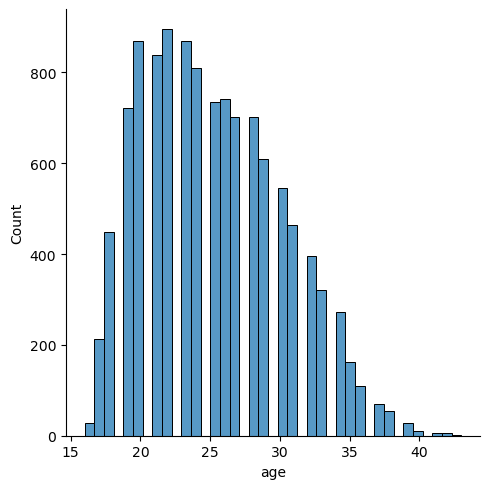

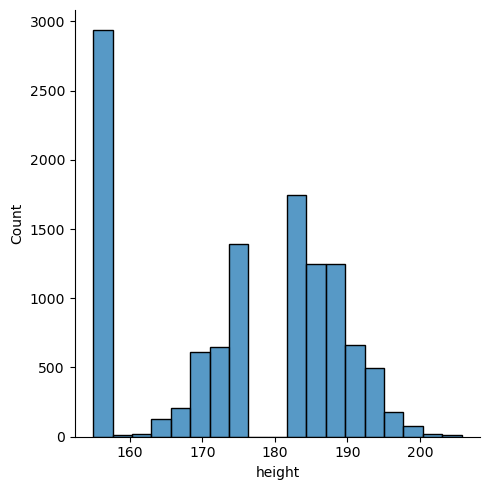

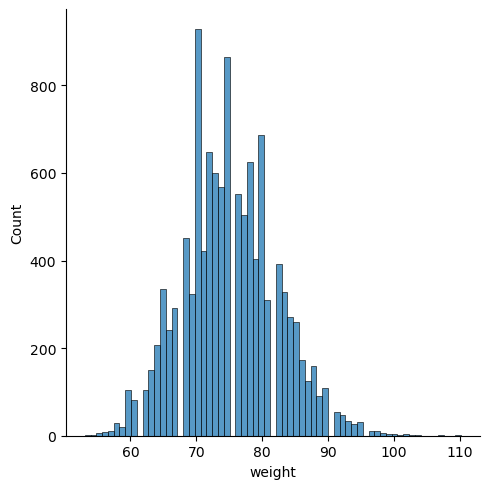

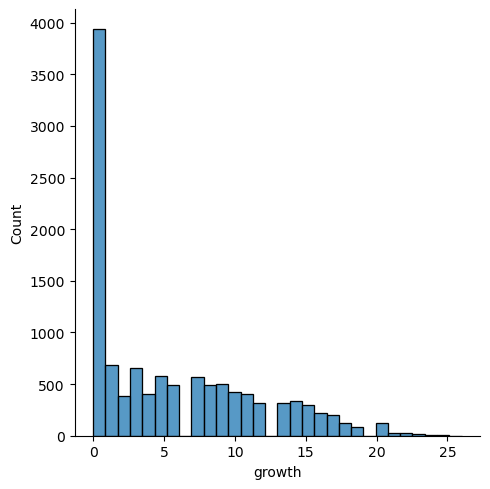

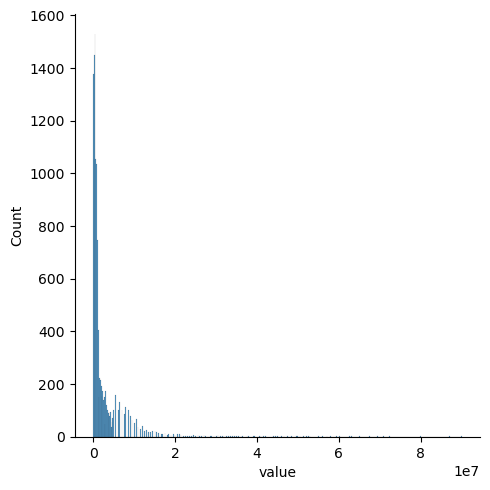

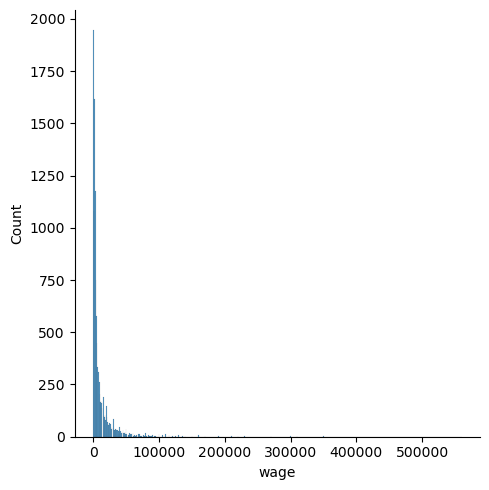

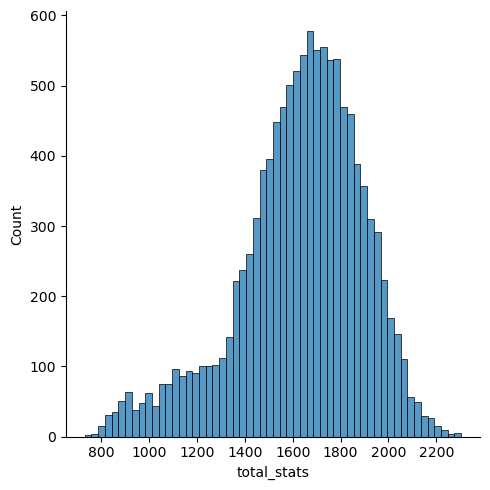

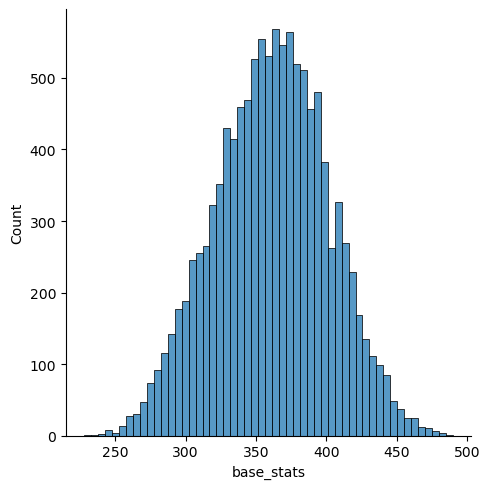

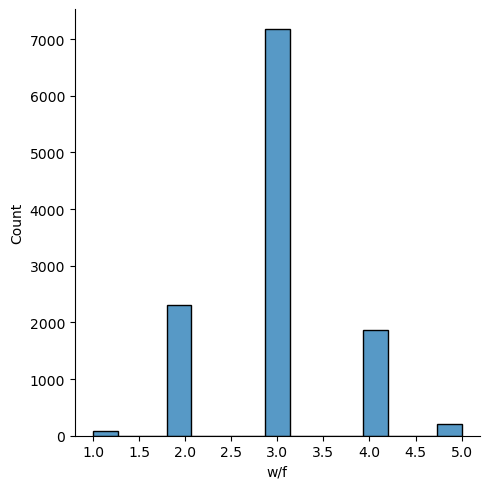

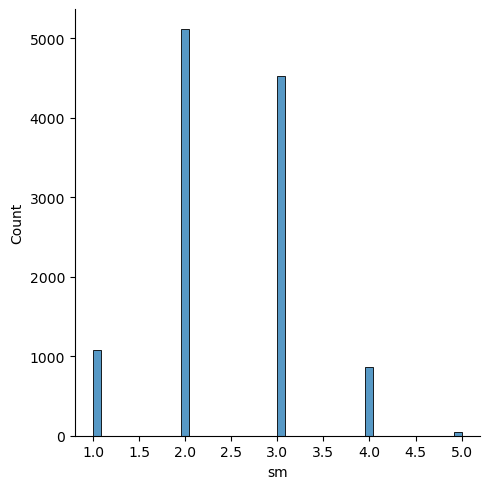

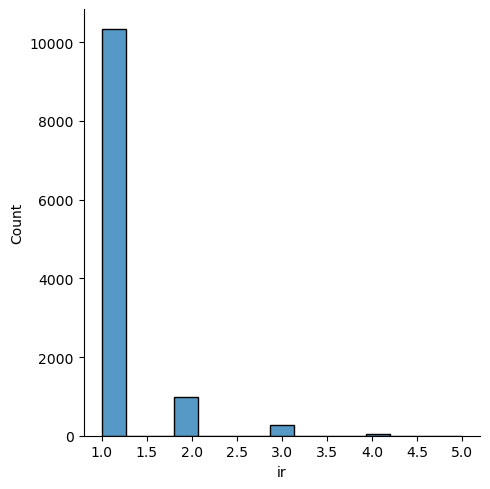

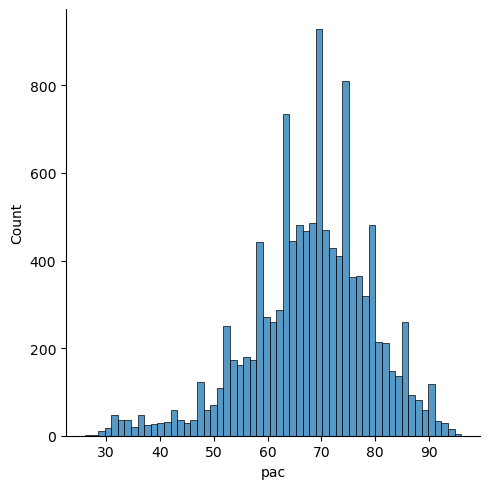

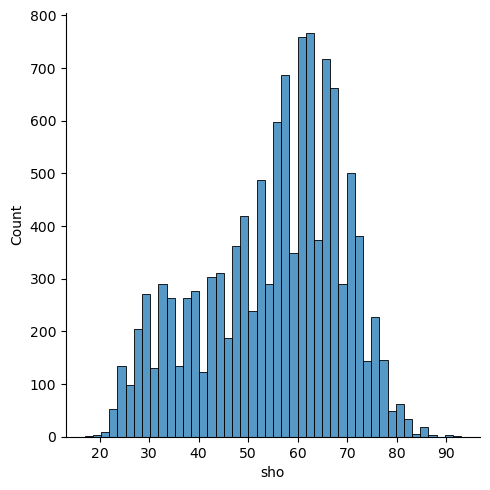

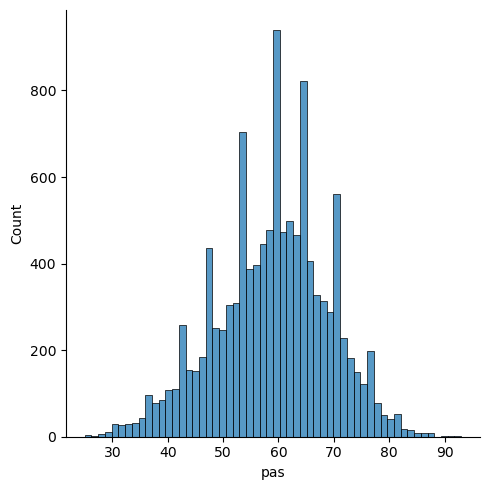

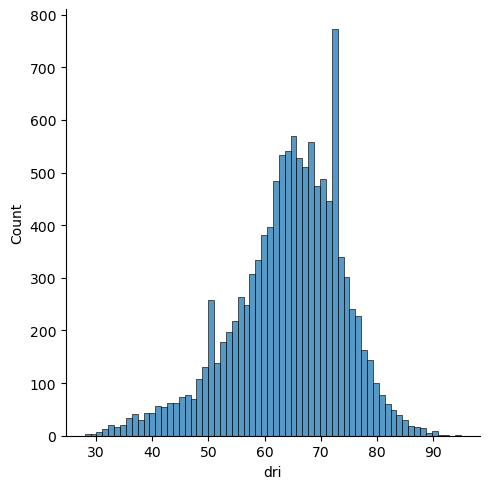

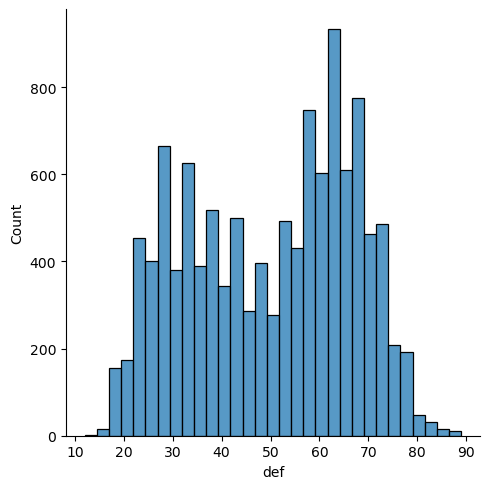

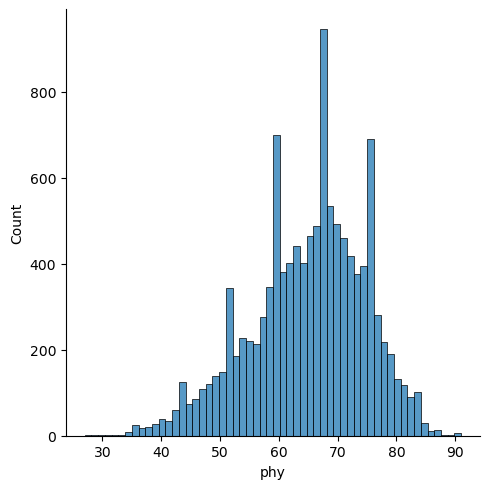

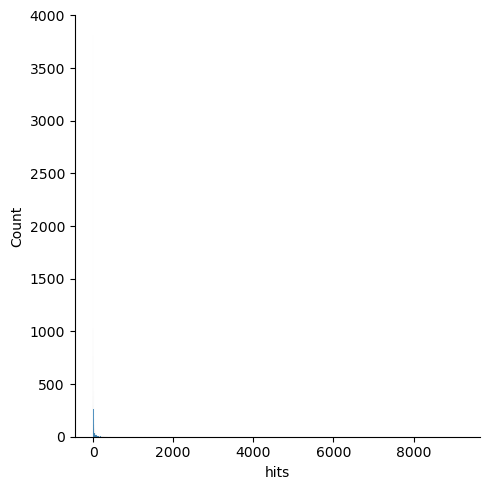

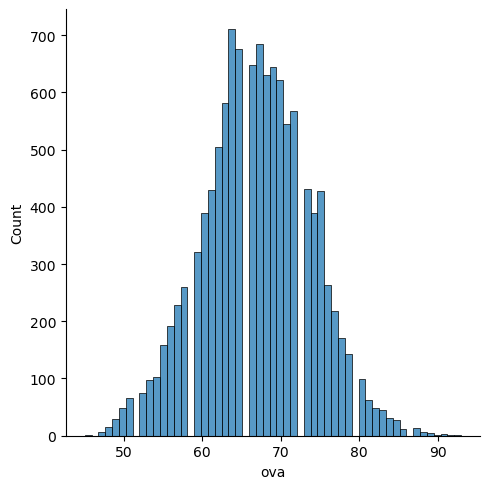

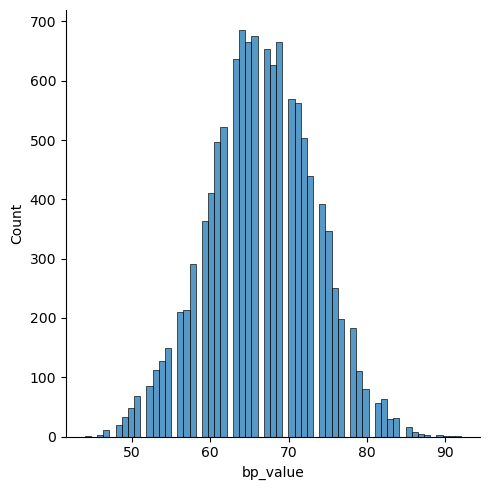

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

for i in numerical:
    sns.displot(fifa1[i])
    plt.show()

##### Check for multicollinearity

In [38]:
correlation_matrix = fifa1.corr()
correlation_matrix = correlation_matrix.round(2)
display(correlation_matrix)

,age,height,weight,growth,value,wage,total_stats,base_stats,w/f,sm,ir,pac,sho,pas,dri,def,phy,hits,ova,bp_value
age,1.00,0.07,0.25,-0.86,0.10,0.20,0.29,0.42,0.09,0.08,0.39,-0.18,0.31,0.40,0.24,0.22,0.43,-0.09,0.52,0.52
height,0.07,1.00,0.51,-0.03,0.01,0.02,-0.30,-0.10,-0.12,-0.32,0.04,-0.28,-0.06,-0.15,-0.22,0.05,0.28,0.00,0.03,0.03
weight,0.25,0.51,1.00,-0.22,0.04,0.07,-0.25,0.00,-0.12,-0.35,0.12,-0.34,0.01,-0.10,-0.21,0.10,0.54,-0.03,0.15,0.15
growth,-0.86,-0.03,-0.22,1.00,-0.19,-0.24,-0.40,-0.52,-0.11,-0.17,-0.28,0.02,-0.34,-0.44,-0.32,-0.24,-0.49,0.07,-0.60,-0.60
value,0.10,0.01,0.04,-0.19,1.00,0.82,0.39,0.53,0.15,0.28,0.48,0.22,0.33,0.45,0.45,0.17,0.27,0.38,0.64,0.63
wage,0.20,0.02,0.07,-0.24,0.82,1.00,0.37,0.47,0.13,0.24,0.56,0.12,0.29,0.41,0.38,0.18,0.25,0.27,0.59,0.58
total_stats,0.29,-0.30,-0.25,-0.40,0.39,0.37,1.00,0.68,0.32,0.71,0.28,0.26,0.32,0.56,0.50,0.39,0.30,0.15,0.61,0.63
base_stats,0.42,-0.10,0.00,-0.52,0.53,0.47,0.68,1.00,0.21,0.37,0.34,0.44,0.62,0.85,0.80,0.33,0.49,0.18,0.83,0.83
w/f,0.09,-0.12,-0.12,-0.11,0.15,0.13,0.32,0.21,1.00,0.33,0.12,0.12,0.25,0.22,0.25,-0.06,-0.01,0.06,0.19,0.21
sm,0.08,-0.32,-0.35,-0.17,0.28,0.24,0.71,0.37,0.33,1.00,0.18,0.33,0.34,0.37,0.46,-0.05,-0.09,0.15,0.35,0.37


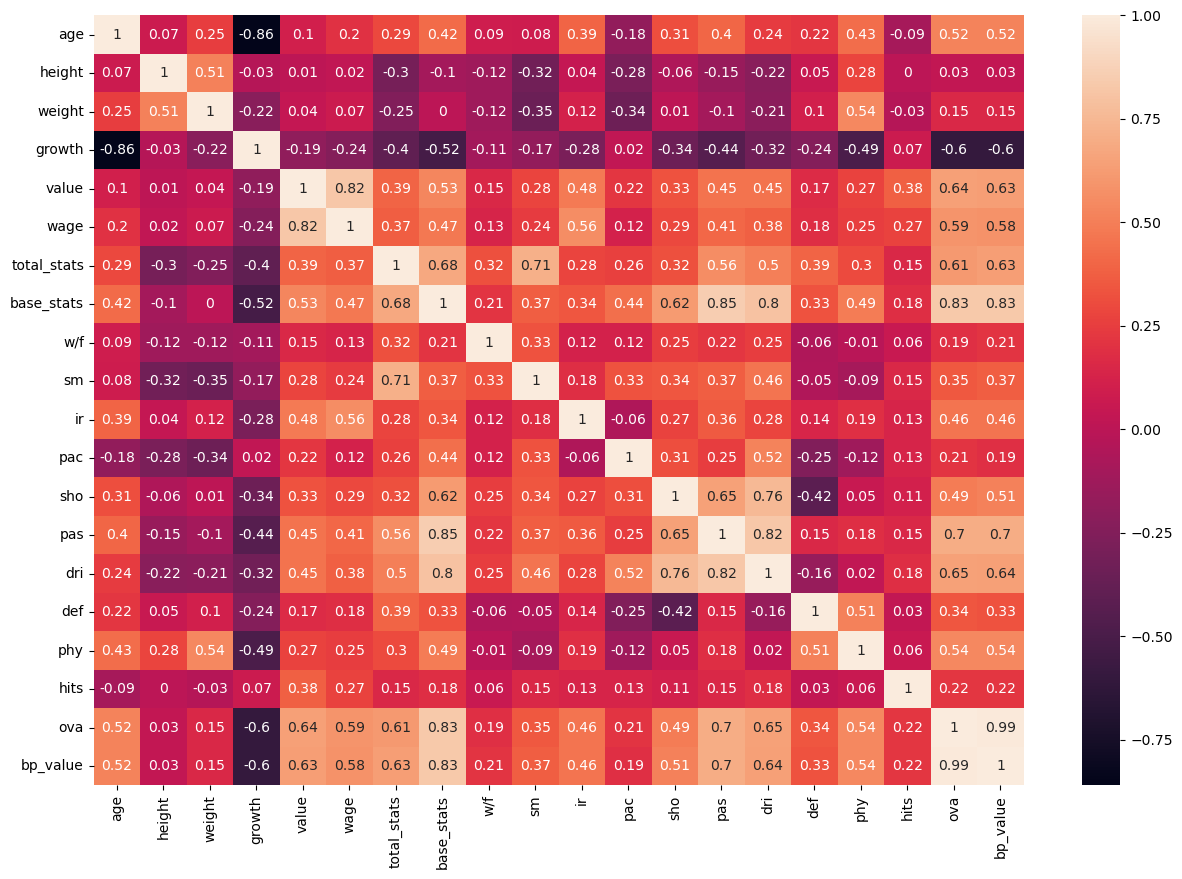

In [39]:
fig, corr_heatmap=plt.subplots(figsize=(15,10))
corr_heatmap = sns.heatmap(correlation_matrix, annot=True)
plt.show()

In [40]:
# Get rid of some variables, that are highly correlated
fifa2 = fifa1.drop(['bp_value', 'value', 'base_stats','height', 'weight','w/f'], axis = 1)

In [41]:
fifa2.shape

(11628, 21)

##### Split the data into y and X 

In [42]:
# Split into y and X
y = fifa2['ova']
X = fifa2.drop(['ova'], axis = 1)

# Create groups for numerical and categorical
X_num = X.select_dtypes(include = np.number)
X_cat = X.select_dtypes(include = object) 

In [43]:
print(X_num.shape)
print(X_cat.shape)

(11628, 13)
(11628, 7)


##### Normalize the data - numericals

In [44]:
# Exercise 2 -Normalize the data
from sklearn.preprocessing import MinMaxScaler

# 1. Create a function 
transformer = MinMaxScaler().fit(X_num) #it will squize in the numbers between the min and max and uniformlly seperate it
# 2. Output are the scaled values
X_normalized = transformer.transform(X_num) #It is a dataframe but will be turned into an array
print(X_normalized.shape)

X_normalized

#Rename it because I change the dataset from an array into a Dataframe
normalized_data = pd.DataFrame(X_normalized, columns=X_num.columns) #correlation matrix for normlized features

(11628, 13)


In [45]:
normalized_data = normalized_data.round(2)
#sns.heatmap(normalized_data, annot = True)
normalized_corr_matrix = normalized_data.corr().round(2)
normalized_corr_matrix

,age,growth,wage,total_stats,sm,ir,pac,sho,pas,dri,def,phy,hits
age,1.00,-0.86,0.21,0.29,0.08,0.39,-0.18,0.31,0.40,0.24,0.23,0.43,-0.09
growth,-0.86,1.00,-0.25,-0.40,-0.17,-0.28,0.02,-0.34,-0.44,-0.32,-0.24,-0.49,0.07
wage,0.21,-0.25,1.00,0.37,0.24,0.56,0.12,0.30,0.42,0.38,0.18,0.26,0.27
total_stats,0.29,-0.40,0.37,1.00,0.71,0.28,0.26,0.32,0.56,0.49,0.39,0.30,0.14
sm,0.08,-0.17,0.24,0.71,1.00,0.18,0.33,0.34,0.37,0.46,-0.05,-0.09,0.14
ir,0.39,-0.28,0.56,0.28,0.18,1.00,-0.06,0.27,0.36,0.28,0.14,0.19,0.12
pac,-0.18,0.02,0.12,0.26,0.33,-0.06,1.00,0.31,0.25,0.52,-0.25,-0.12,0.13
sho,0.31,-0.34,0.30,0.32,0.34,0.27,0.31,1.00,0.65,0.76,-0.42,0.06,0.11
pas,0.40,-0.44,0.42,0.56,0.37,0.36,0.25,0.65,1.00,0.82,0.15,0.17,0.14
dri,0.24,-0.32,0.38,0.49,0.46,0.28,0.52,0.76,0.82,1.00,-0.16,0.02,0.18


##### One Hot Encoding - categoricals

In [46]:
X_cat = X_cat.drop(['name', 'nationality', 'club'], axis = 1)

In [47]:
# JUST DO ONE HOT LABEL ENCODING FOR NOW - Later split it
from sklearn.preprocessing import OneHotEncoder

# Step 1. 
#We need to train the encoder with a command to create dummy variables
encoder = OneHotEncoder(drop='first').fit(X_cat)

#2. Show the new categories
print(encoder.categories_)

# 3. Change the variable into an array
encoded = encoder.transform(X_cat).toarray()
print(encoded)

# 4. Create cols
cols=[]
for row in encoder.categories_:
    for colname in row:
        cols.append(colname)
cols

# 5. Add names to the features again
cols = encoder.get_feature_names(input_features=X_cat.columns)
cols

# 6. Let's see if it worked
onehot_encoded = pd.DataFrame(encoded, columns=cols)
onehot_encoded.head(2)

[array(['cam', 'cb', 'cdm', 'cf', 'cm', 'gk', 'lb', 'lm', 'lw', 'lwb',
       'rb', 'rm', 'rw', 'rwb', 'st'], dtype=object), array(['Left', 'Right'], dtype=object), array(['High', 'Low', 'Medium'], dtype=object), array(['High', 'Low', 'Medium'], dtype=object)]
[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 1. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 1. 0.]]


/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,bp_cb,bp_cdm,bp_cf,bp_cm,bp_gk,bp_lb,bp_lm,bp_lw,bp_lwb,bp_rb,bp_rm,bp_rw,bp_rwb,bp_st,foot_Right,a/w_Low,a/w_Medium,d/w_Low,d/w_Medium
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0


##### Concat the features and prepare for analysis

In [48]:
X = pd.concat([normalized_data, onehot_encoded], axis = 1)

In [49]:
X.head()

,age,growth,wage,total_stats,sm,ir,pac,sho,pas,dri,def,phy,hits,bp_cb,bp_cdm,bp_cf,bp_cm,bp_gk,bp_lb,bp_lm,bp_lw,bp_lwb,bp_rb,bp_rm,bp_rw,bp_rwb,bp_st,foot_Right,a/w_Low,a/w_Medium,d/w_Low,d/w_Medium
0,0.37,0.04,0.01,0.60,0.25,0.00,0.61,0.45,0.56,0.52,0.51,0.52,0.00,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.52,0.00,0.04,0.78,0.75,0.25,0.81,0.76,0.63,0.81,0.27,0.69,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
2,0.63,0.00,0.09,0.76,0.75,0.25,0.77,0.79,0.78,0.87,0.19,0.45,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.22,0.50,0.01,0.51,0.25,0.00,0.44,0.36,0.43,0.43,0.58,0.52,0.00,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
4,0.26,0.31,0.00,0.59,0.50,0.00,0.57,0.36,0.51,0.54,0.62,0.61,0.00,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0


##### Train-test split

In [50]:
from sklearn.model_selection import train_test_split

# train test split, will output 4 values - good to call them X_train, X_test, y_train and y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # insert the label and features, 0.2 is 20% for testing
# random_state is used to always have the same test set, same selection will be made - good to use when you want to have the same results, any number can be used

# Let's see if it worked
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(9302, 32)
(2326, 32)
(9302,)
(2326,)


##### Modeling

In [51]:
# Define the linear regression model

lm= linear_model.LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

###### Model Validation

In [52]:
# R2 for the train values
from sklearn.metrics import r2_score
predictions = lm.predict(X_train) 
r2_train = r2_score(y_train, predictions)
r2_train

0.8572034969981771

In [53]:
# R2 for the test values
predictions_test = lm.predict(X_test) 
r2_test = r2_score(y_test, predictions_test)
print( 'The R2 is', r2_test)

The R2 is 0.8598760831032327


In [54]:
# MSE - TEST VALUES
from sklearn.metrics import mean_squared_error
mse_test=mean_squared_error(y_test,predictions_test)
print('The MSE is', mse_test)

# RMSE - TEST VALUES
rmse_test = np.sqrt(mean_squared_error(y_test,predictions_test))
print('The RMSE is', rmse_test)

# MAE - TEST VALUES
from sklearn.metrics import mean_absolute_error
mae_test = mean_absolute_error(y_test, predictions_test)
print('The MAE is', mae_test)

The MSE is 6.537788465825679
The RMSE is 2.55690994480167
The MAE is 1.9594998495608928


In [55]:
mean_ova = np.mean(fifa1['ova'])
mean_ova

66.91305469556244

##### Import the prediction model
1. 

In [56]:
# get the data
fifa_predict = pd.read_csv('fifa21_validate.csv')

In [57]:
fifa_predict.head()

,ID,Name,Age,Nationality,Club,BP,Position,Team & Contract,Height,Weight,foot,Growth,Joined,Loan Date End,Value,Wage,Release Clause,Contract,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,OVA
0,219461,E. Palmer-Brown,23,United States,FK Austria Wien,CB,CB,"FK Austria Wien Jun 30, 2021 On Loan","6'2""",194lbs,Right,7,"Feb 8, 2018","Jun 30, 2021",€975K,€5K,€0,"Jun 30, 2021 On Loan",230,47,21,62,60,40.0,228,44,43.0,36,51,54,303,60,68,63.0,63,49.0,288,48,77.0,51,87,25,246,68,62.0,38.0,39.0,39,49.0,200,68,67,65.0,56,11,8,15,13,9,1551,334,2 ★,2★,Low,High,1 ★,64,30,50,50,66,74,34,48+2,48+2,48+2,48+0,47+0,47+0,47+0,48+0,48+2,48+2,48+2,50+2,51+2,51+2,51+2,50+2,59+2,61+2,61+2,61+2,59+2,61+2,67+2,67+2,67+2,61+2,16+2,67
1,221896,D. Avdijaj,22,Kosovo,Heart of Midlothian,CAM,LM CAM,Heart of Midlothian 2020 ~ 2020,"5'8""",154lbs,Right,5,"Jan 20, 2020",NaN,€1.2M,€3K,€2.2M,2020 ~ 2020,298,62,60,44,62,70.0,330,76,68.0,56,60,70,375,77,72,83.0,64,79.0,323,76,62.0,63,47,75,286,72,26.0,64.0,64.0,60,65.0,61,19,23,19.0,53,14,13,9,9,8,1726,358,4 ★,3★,High,Low,1 ★,74,67,62,74,24,57,12,64+2,64+2,64+2,68+0,68+0,68+0,68+0,68+0,68+2,68+2,68+2,67+2,61+2,61+2,61+2,67+2,49+2,47+2,47+2,47+2,49+2,45+2,38+2,38+2,38+2,45+2,17+2,68
2,247428,D. Ochoa,19,United States,Real Salt Lake,GK,GK,Real Salt Lake 2018 ~ 2020,"6'2""",176lbs,Right,17,"Nov 28, 2018",NaN,€120K,€500,€249K,2018 ~ 2020,48,7,5,11,21,4.0,52,6,8.0,8,20,10,165,28,25,33.0,41,38.0,171,40,49.0,22,54,6,76,20,9.0,7.0,26.0,14,31.0,27,8,9,10.0,269,56,52,53,53,55,808,295,2 ★,1★,Medium,Medium,1 ★,56,52,53,55,26,53,3,18+2,18+2,18+2,15+0,17+0,17+0,17+0,15+0,17+2,17+2,17+2,16+2,18+2,18+2,18+2,16+2,16+2,18+2,18+2,18+2,16+2,16+2,18+2,18+2,18+2,16+2,53+2,54
3,255120,N. Kenneh,16,England,Leeds United,CDM,CB CDM RB,Leeds United 2020 ~ 2022,"6'3""",170lbs,Right,23,"Jan 10, 2020",NaN,€160K,€500,€464K,2020 ~ 2022,215,38,31,55,59,32.0,224,51,34.0,38,47,54,275,59,58,56.0,48,54.0,242,48,48.0,60,58,28,230,61,55.0,33.0,40.0,41,59.0,159,53,52,54.0,36,7,5,13,5,6,1381,303,3 ★,2★,Medium,Medium,1 ★,58,34,47,52,53,59,6,46+2,46+2,46+2,47+0,46+0,46+0,46+0,47+0,47+2,47+2,47+2,49+2,49+2,49+2,49+2,49+2,53+2,54+2,54+2,54+2,53+2,53+2,54+2,54+2,54+2,53+2,11+2,55
4,215556,E. Fernandes,24,Switzerland,1. FSV Mainz 05,CDM,CM CDM,1. FSV Mainz 05 2019 ~ 2023,"6'2""",170lbs,Right,5,"Jul 1, 2019",NaN,€2.3M,€13K,€4.3M,2019 ~ 2023,295,57,59,45,78,56.0,327,71,57.0,51,74,74,320,68,66,66.0,64,56.0,337,73,56.0,74,72,62,314,66,78.0,53.0,62.0,55,63.0,211,72,68,71.0,60,12,7,13,15,13,1864,407,4 ★,2★,Medium,Medium,1 ★,67,62,68,70,69,71,45,63+2,63+2,63+2,66+0,66+0,66+0,66+0,66+0,68+2,68+2,68+2,67+2,70+2,70+2,70+2,67+2,70+2,72+2,72+2,72+2,70+2,69+2,68+2,68+2,68+2,69+2,18+2,70


In [58]:
def clean_data(df):

# Standardize our columns so they look the same
    df.columns =[colname.lower().replace(' ','_') for colname in df.columns]

# Drop values we not need

    df=df.drop(columns=['id', 'team_&_contract','joined', 'loan_date_end', 'position','contract','ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram',
       'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb',
       'lcb', 'cb', 'rcb', 'rb', 'gk','release_clause','attacking', 'crossing',
       'finishing', 'heading_accuracy', 'short_passing', 'volleys', 'skill',
        'dribbling', 'curve', 'fk_accuracy', 'long_passing', 'ball_control',
       'movement', 'acceleration', 'sprint_speed', 'agility', 'reactions',
       'balance', 'power', 'shot_power', 'jumping', 'stamina', 'strength',
       'long_shots', 'mentality', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'composure', 'defending', 'marking',
       'standing_tackle', 'sliding_tackle', 'goalkeeping', 'gk_diving',
       'gk_handling', 'gk_kicking', 'gk_positioning', 'gk_reflexes', 'value', 'base_stats','height', 'weight','w/f','name', 'nationality', 'club'], axis = 1)

#Convert wage into integers
    df['wage'] = [x.replace('€', '').replace('K','000') for x in df['wage']]
    df['wage'] = df['wage'].apply(pd.to_numeric)
# Get rid of the star
    
    df['sm'] = [i.replace('★','') for i in df['sm']]
    df['sm'] = df['sm'].apply(pd.to_numeric)
    
    df['ir'] = [i.replace('★','') for i in df['ir']]
    df['ir'] = df['ir'].apply(pd.to_numeric)

# Get rid of the NaN values
    df = df.dropna()
    
# Change hits into integer
    
    return df

In [59]:
fifa_predict = clean_data(fifa_predict)

In [60]:
fifa_predict.head()

,age,bp,foot,growth,wage,total_stats,sm,a/w,d/w,ir,pac,sho,pas,dri,def,phy,hits,ova
0,23,CB,Right,7,5000,1551,2,Low,High,1,64,30,50,50,66,74,34,67
1,22,CAM,Right,5,3000,1726,3,High,Low,1,74,67,62,74,24,57,12,68
2,19,GK,Right,17,500,808,1,Medium,Medium,1,56,52,53,55,26,53,3,54
3,16,CDM,Right,23,500,1381,2,Medium,Medium,1,58,34,47,52,53,59,6,55
4,24,CDM,Right,5,13000,1864,2,Medium,Medium,1,67,62,68,70,69,71,45,70


In [61]:
fifa_predict.dtypes

age             int64
bp             object
foot           object
growth          int64
wage            int64
total_stats     int64
sm              int64
a/w            object
d/w            object
ir              int64
pac             int64
sho             int64
pas             int64
dri             int64
def             int64
phy             int64
hits           object
ova             int64
dtype: object

In [62]:
hits2 = []
for x in fifa_predict['hits']:
    x = x.replace('K','000')
    x = x.replace('.','_')
    
    if '_' in x:
        x = x.replace('_','')
        x = int(x)/10
    hits2.append(int(x))
        
hits2

fifa_predict['hits'] = hits2

In [63]:
fifa_predict.dtypes

age             int64
bp             object
foot           object
growth          int64
wage            int64
total_stats     int64
sm              int64
a/w            object
d/w            object
ir              int64
pac             int64
sho             int64
pas             int64
dri             int64
def             int64
phy             int64
hits            int64
ova             int64
dtype: object

##### Create numerical and categorical X for validation model

In [68]:
y_predict = fifa_predict['ova']
X_predict = fifa_predict.drop(['ova'], axis = 1)

# Create groups for numerical and categorical
X_num_predict = X_predict.select_dtypes(include = np.number)
X_cat_predict = X_predict.select_dtypes(include = object) 

In [69]:
X_num_predict.head()

,age,growth,wage,total_stats,sm,ir,pac,sho,pas,dri,def,phy,hits
0,23,7,5000,1551,2,1,64,30,50,50,66,74,34
1,22,5,3000,1726,3,1,74,67,62,74,24,57,12
2,19,17,500,808,1,1,56,52,53,55,26,53,3
3,16,23,500,1381,2,1,58,34,47,52,53,59,6
4,24,5,13000,1864,2,1,67,62,68,70,69,71,45


##### Normalize numerical - MinMax

In [70]:
X_p_normalized = transformer.transform(X_num_predict)
X_p_normalized = pd.DataFrame(X_p_normalized,columns=X_num_predict.columns)


##### One Hot Encoding

In [74]:
X_cat_predict['bp']=X_cat_predict['bp'].str.lower()

In [75]:
X_cat_predict.head()

,bp,foot,a/w,d/w
0,cb,Right,Low,High
1,cam,Right,High,Low
2,gk,Right,Medium,Medium
3,cdm,Right,Medium,Medium
4,cdm,Right,Medium,Medium


In [76]:
encoded_for_p = encoder.transform(X_cat_predict).toarray()
encoded_for_p
encoder.categories_
onehot_encoded_for_p = pd.DataFrame(encoded_for_p)

##### Concat X

In [77]:
X_for_predict = pd.concat([X_p_normalized, onehot_encoded_for_p], axis=1)

##### Predict and inspect 

In [79]:
X_for_predict.dtypes

age            float64
growth         float64
wage           float64
total_stats    float64
sm             float64
ir             float64
pac            float64
sho            float64
pas            float64
dri            float64
def            float64
phy            float64
hits           float64
0              float64
1              float64
2              float64
3              float64
4              float64
5              float64
6              float64
7              float64
8              float64
9              float64
10             float64
11             float64
12             float64
13             float64
14             float64
15             float64
16             float64
17             float64
18             float64
dtype: object

In [80]:
results_for_prediction = lm.predict(X_for_predict)
results_for_prediction

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([66.34995989, 66.8376467 , 55.19860367, ..., 73.16998557,
       64.32188238, 59.61266297])

In [85]:
r2_predict = r2_score(y_predict, results_for_prediction)
print( 'The R2 is', r2_test)

The R2 is 0.8548600004337872


In [87]:
mse_predict=mean_squared_error(y_predict,results_for_prediction)
print('The MSE is', mse_predict)

The MSE is 6.620421332178529


In [88]:
rmse_predict = np.sqrt(mean_squared_error(y_predict,results_for_prediction))
print('The RMSE is', rmse_predict)

The RMSE is 2.5730179424517288


In [89]:
mae_predict = mean_absolute_error(y_predict, results_for_prediction)
print('The MAE is', mae_predict)

The MAE is 1.9610869663659458
